# Root Locus Plots

From feedback equation, the transfer function from $r$ to $y$ is just $T$, so we have:
$$
\begin{align*}
Y(s) &= T(s)R(s) \\
&= \frac{P(s)K}{1 + P(s)K}R(s)
\end{align*}
$$

Express $P(s) = \frac{B(s)}{A(s)}$:
$$
\begin{align*}
Y(s) &= \frac{\frac{B(s)}{A(s)}K}{1 + \frac{B(s)}{A(s)}K}R(s) \\
&= \frac{KB(s)}{A(s) +B(s)K}R(s)
\end{align*}
$$
This is the transfer function of the closed-loop system. Key observations:
- Poles of the system depend on $K$
- When $K=0$, the poles of the closed-loop system are the same as those of the open-loop system (i.e. $P(s)$). Why?
- When $K=\infty$, the poles of the closed-loop system are equal to the zeros of the open-loop system. Why?

# The Plot
- Plot an $+$ at the open-loop poles (are starting points of the lines). 
- Let $K = 0 \to \infty$, and plot the progression of the poles of the closed-loop system in the s-plane.
- Plot a $o$ at the open-loop zeros (will be terminating points of the lines).

Observations:
- Each line on the plot starts at an open-loop pole.
- If there are open-loop zeros, then some of the lines will end at a zero.
- If there are more poles than zeros, then there will be asymptotes.


In [1]:
import numpy as np
import control as ct
import enel441_utilities as eu
import matplotlib.pyplot as plt

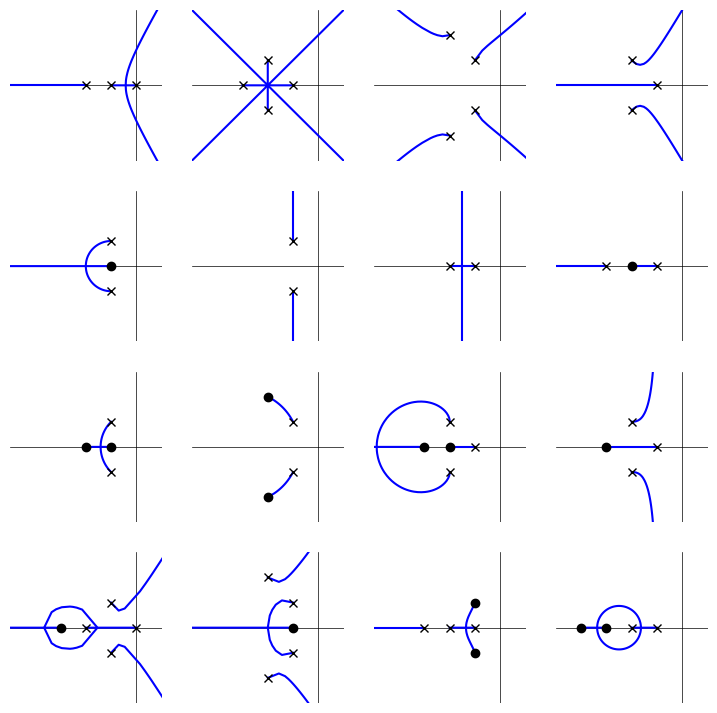

In [2]:
poles = [[np.array([]) for i in range(4)] for i in range(4)]
zeros = [[np.array([]) for i in range(4)] for i in range(4)]

poles[0][0] = np.array([-2, -1, 0])
#zeros[0][0] = []

poles[0][1] = np.array([-2-1j, -2+1j, -3, -1])
#zeros[0][1] = []

poles[0][2] = np.array([-1-1j, -1+1j, -2-2j, -2+2j])
#zeros[0][2] = []

poles[0][3] = np.array([-2-1j, -2+1j, -1])
#zeros[0][3] = []

poles[1][0] = np.array([-1-1j, -1+1j])
zeros[1][0] = np.array([-1])

poles[1][1] = np.array([-1-1j, -1+1j])
#zeros[1][1] = []

poles[1][2] = np.array([-1, -2])
#zeros[1][2] = []

poles[1][3] = np.array([-1, -3])
zeros[1][3] = np.array([-2])

poles[2][0] = np.array([-1-1j, -1+1j])
zeros[2][0] = np.array([-1, -2])

poles[2][1] = np.array([-1-1j, -1+1j])
zeros[2][1] = np.array([-2-2j, -2+2j])

poles[2][2] = np.array([-2-1j, -2+1j, -1])
zeros[2][2] = np.array([-2, -3])

poles[2][3] = np.array([-2-1j, -2+1j, -1])
zeros[2][3] = np.array([-3])

poles[3][0] = np.array([-1-1j, -1+1j, 0, -2])
zeros[3][0] = np.array([-3])

poles[3][1] = np.array([-1-1j, -1+1j, -2+2j, -2-2j])
zeros[3][1] = np.array([-1])

poles[3][2] = np.array([-1, -2, -3])
zeros[3][2] = np.array([-1-1j, -1+1j])

poles[3][3] = np.array([-1, -2])
zeros[3][3] = np.array([-3, -4])

fig,ax = plt.subplots(4,4, figsize=(9,9))
for ii in range(4):
    for jj in range(4):
        den = eu.roots_to_polynomial(poles[ii][jj])
        num = eu.roots_to_polynomial(zeros[ii][jj])
        P = ct.tf(num,den)
        cl_poles, K = ct.root_locus(P, plot=False)

        ax[ii,jj].plot([-5,1],[0,0],'k',linewidth=0.5)
        ax[ii,jj].plot([0,0],[-3,3],'k',linewidth=0.5)
        ax[ii,jj].plot(np.real(cl_poles), np.imag(cl_poles), 'b')
        ax[ii,jj].plot(np.real(poles[ii][jj]),np.imag(poles[ii][jj]), 'kx' )
        ax[ii,jj].plot(np.real(zeros[ii][jj]),np.imag(zeros[ii][jj]), 'ko' )
        ax[ii,jj].set_xlim(-5,1)
        ax[ii,jj].set_ylim(-3,3)
        ax[ii,jj].axis('off')
        



# Some interesting observations (for the future)
- Note the effect of placing a zero (in the left-half plane)! A system that could be unstable (for large values of $K$) can be guaranteed to be stable. For example, see the progression from (1,4) -> (3,4) -> (3,3) as more zeros are added to the system. 

# Look at another Example System - Active Suspension for a Car

![Car suspension](car_suspension.png "Car suspension")
source: https://auto.howstuffworks.com/car-suspension.htm


![Car suspension diagram](car-suspension-diagram.png "Car suspension diagram")


![Car suspension free body diagram](car-suspension-free-body-diagram.png "Car suspension free body diagram")

where,
- $F_u$ is the force applied by the active suspension
- $F_g$ is the force due to gravity
- $F_s$ is the force due to the spring
- $F_d$ is the force due to the damper
- $x_c$ is vertical position of car
- $x_g$ is vertical position of the ground

Force due to drag:
$$
\begin{align*}
F_d = k_d v_c 
\end{align*}
$$
where 
- $k_d$ is drag coefficient,
- $v_c$ is vertical speed of the car. 


# In Class Activity! 

Determine the transfer function from $F$ to $x$

Sum forces:
$$
\begin{align*}
\sum_k F_k &= ma \\
-F_s - F_d - F_g + F_u &= ma_c \\
-k(x_c-x_g) - b(\frac{dx_c}{dt}-\frac{dx_g}{dt}) - mg + F_u = m\frac{d^2x_c}{dt^2}
\end{align*}
$$
Take Laplace transform of both sides:
$$
\begin{align*}
-k(X_c(s) - X_g(s)) - b(sX_c(s) - sX_g(s)) - mg + F_u(s) = ms^2X_c(s) \\
 + X_g(s) (k + bs) - mg + F_u(s) = X_c(s) ( k + bs + ms^2) \\
X_c(s) = \frac{k+bs}{k + bs + ms^2}X_g(s) + \frac{1}{k + bs + ms^2}F_u(s) - \frac{mg}{k + bs + ms^2}
\end{align*}
$$
Let's take a pause here. For a linear system, if we double in the input, we will get double the output. Is our current expression for $X_c$ linear with respect to the inputs $F_u$ and $X_g$?

Let's double both inputs and determine the output. Let $\tilde{X}_c$ denote the output with doubled inputs:
$$
\begin{align*}
\tilde{X}_c(s) &= \frac{k+bs}{k + bs + ms^2}2 X_g(s) + \frac{1}{k + bs + ms^2}2 F_u(s) - \frac{mg}{k + bs + ms^2} \\
&= 2X_c(s) + \frac{mg}{k + bs + ms^2}
\end{align*}
$$

We did not get double the output (i.e. we don't have $\tilde{X}_c = 2X_c$)! The term due to gravity is getting in the way! 



# Attempt #2. Write the equations around the equilibrium point (this will absorb the term due to gravity).

At equilibrium:
$$
\begin{align*}
x_c &= x_{eq}, \\
\frac{dx_c}{dt} &= 0, \\
\frac{d^2x_c}{dt^2} &= 0, \\
x_g &= 0, \\
\frac{dx_g}{dt} &= 0, \\
F_u &= 0
\end{align*}
$$
Substitute these values into the original expression, and solve for $x_{eq}$:
$$
\begin{align*}
-kx_{eq} - mg &= 0 \\
x_{eq} &= -\frac{mg}{k}
\end{align*}
$$
Now we can express $x_c$ is terms of a relative change from its equilibrium position:
$$
\begin{align*}
x_c = x_{eq} + x_{\Delta}
\end{align*}
$$

Note that the following equalities hold:
$$
\begin{align*}
\frac{d x_c}{dt} &= \frac{d x_{\Delta}}{dt} \\
\frac{d^2 x_c}{dt}^2 &= \frac{d^2 x_{\Delta}}{dt^2} 
\end{align*}
$$

Now substitute $x_c = x_{eq} + x_{\Delta}$ into the original differential equation:
$$
\begin{align*}
-k(x_{eq} + x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) - mg + F_u = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Recall that $x_{eq} = -\frac{mg}{k}. Substitute this into the equation:
$$
\begin{align*}
-k(x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) + F_u = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Take Laplace transform of both sides, and gather terms:
$$
\begin{align*}
(b s + k)X_g(s) + F(s) &= (ms^2 + bs + k) X_{\Delta}(s) \\
X_{\Delta}(s) &= \frac{(b s + k)}{(ms^2 + bs + k)}X_g(s) + \frac{1}{(ms^2 + bs + k)}F(s)
\end{align*}
$$

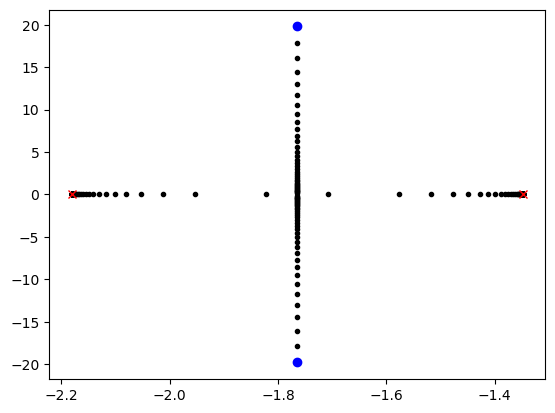

In [3]:
import control as ct
import numpy as np
import enel441_utilities as eu
import math
import scipy as sp
import matplotlib.pyplot as plt

b = 9
k = 7.5
m = 2.55

k_range = np.logspace(-6,3,100)
fig,ax = eu.enel441_root_locus(np.array([1]),np.array([m, b, k]),k_range) 
plt.show()


# What can we observe?

- System is stable for all $K$
- For small $K$, poles are real (near red cross)
- For large $K$, poles are complex (near blue dot)

# Suppose that we use a pneumatic actuator that is relatively slow.

Let the model for the actuator be $\frac{1}{s+0.5}$. What does the frequency response look like? 

So now the applied force is equal to $F(s) = \frac{F_c(s)}{s+0.5}$, where $F(s)$ is the output force of the actuator, and $F_c(s)$ is the commanded force. 

Plug this into our model:
$$
\begin{align*}
X_{\Delta}(s) &= \frac{(b s + k)}{(ms^2 + bs + k)}X_g(s) + \frac{1}{(s+0.5)(ms^2 + bs + k)}F_c(s)
\end{align*}
$$


# In Class Activity!

Look at Root Locus for the new model. What do you see?

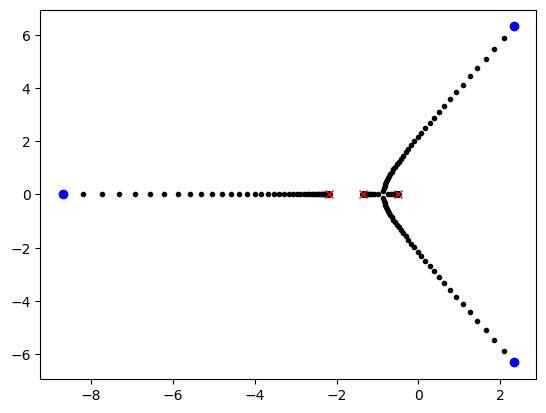

In [6]:
b = 9
k = 7.5
m = 2.55
a = 0.5

k_range = np.logspace(-6,3,100)
fig,ax = eu.enel441_root_locus(np.array([1]),np.array([m, b+0.5*m, k+0.5*b, 0.5*k]),k_range) 
plt.show()